In [97]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.api.models import Sequential
from keras.api.layers import Dense

In [98]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_hidden_input = np.random.rand(input_size, hidden_size)
        self.weights_hidden_out = np.random.rand(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def sigmoid_derivative(x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden_layer_values = np.dot(X, self.weights_hidden_input) +self.bias_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_values)
        self.output_layer_values = np.dot(self.hidden_layer_output,self.weights_hidden_out) + self.bias_output
        self.output_layer_out = self.sigmoid(self.output_layer_values)
        return self.output_layer_out
        
    def backward(self, X, y, predicted):
        dS_out = predicted - y
        dW_out = np.dot(self.hidden_layer_output.T, dS_out)
        db_out = np.sum(dS_out, axis=0, keepdims=True)
        dS_hidden = np.dot(dS_out, self.weights_hidden_out.T) * self.sigmoid_derivative(self.hidden_layer_output)
        dW_hidden = np.dot(X.T, dS_hidden)
        db_hidden = np.sum(dS_hidden, axis=0, keepdims=True)
        return dW_hidden, dW_out, db_hidden, db_out
    def update(self, dW_hidden, dW_out, db_hidden, db_out):
        self.weights_hidden_input -= learning_rate * dW_hidden
        self.weights_hidden_out -= learning_rate * dW_out
        self.bias_hidden -= learning_rate * db_hidden
        self.bias_output -= learning_rate * db_out
    def predict(self, X):
        return self.forward(X)

In [118]:
#%% Data preprocessing
# Input dataset (Weight, Size)
inputs = np.array([[120, 10], [180, 12], [90, 8], [110, 7.5], [150, 11], [170,13], [95, 9], [130, 10.5], [200, 14], [100, 8]])
# Labels (one-hot encoded): Eggplant = 1, Carrot = 0
outputs = np.array([[1], [1], [0], [0], [1], [1], [0], [1], [1], [0]])
#%% Normalize the inputs
scaler = StandardScaler()
# inputs_scaled = scaler.fit_transform(inputs)
inputs_scaled = inputs/np.max(inputs,axis=0)
#%% Convert data to TensorFlow tensors
# inputs_scaled = tf.convert_to_tensor(inputs_scaled, dtype=tf.float32)
# outputs = tf.convert_to_tensor(outputs, dtype=tf.float32)

In [119]:
# epochs=1000
learning_rate=0.1

In [120]:
input_size=12
hidden_size=8
output_size=1

In [121]:
model=SimpleNeuralNetwork(inputs_scaled.shape[1],2,outputs.shape[1])

In [122]:
cost_history = []
epoch = 0
max_epochs = 10000  # SỐ lượng lần lặp max
no_change_limit = 10  # Số lần cost không đổi
tolerance = 0.00001 # giá trị cost để so sánh

no_change_count = 0 

while epoch < max_epochs:
    predicted = model.forward(inputs_scaled)

    cost = -np.mean(np.sum(outputs * np.log(predicted) + (1 - outputs) * np.log(1 - predicted), axis=1))
    cost_history.append(cost)
    
    if epoch > 0:
        if abs(cost_history[-2] - cost) < tolerance:
            no_change_count += 1
        else:
            no_change_count = 0

        if no_change_count >= no_change_limit:
            print(f'No significant change in cost for {no_change_limit} epochs. Stopping early at epoch {epoch}.')
            break

    dW1, dW2, db1, db2 = model.backward(inputs_scaled, outputs, predicted)
    model.update(dW1, dW2, db1, db2)
    
    if epoch % 100 == 0:
        print(f'epoch {epoch}, Cost: {cost}')

    epoch += 1

# In case the loop ends due to reaching max_epochs
if epoch == max_epochs:
    print(f'Stopped at maximum epochs {max_epochs}, Cost: {cost}')

epoch 0, Cost: 0.6654262039110226
epoch 100, Cost: 0.5791916271759553
epoch 200, Cost: 0.3255931712986427
epoch 300, Cost: 0.17503597293813564
epoch 400, Cost: 0.1095612279262896
epoch 500, Cost: 0.07578154548225653
epoch 600, Cost: 0.056139148799264106
epoch 700, Cost: 0.043690952190292565
epoch 800, Cost: 0.03527287851072845
epoch 900, Cost: 0.029286803103836922
epoch 1000, Cost: 0.024857602223629656
epoch 1100, Cost: 0.021473745275250606
epoch 1200, Cost: 0.018819782624881074
epoch 1300, Cost: 0.016692325408312815
epoch 1400, Cost: 0.014955228271498783
epoch 1500, Cost: 0.013514403056530344
epoch 1600, Cost: 0.012303018093132816
No significant change in cost for 10 epochs. Stopping early at epoch 1678.


In [123]:
print('predict outputs after training: ')
predicted_output=model.predict(inputs_scaled)
print(predicted_output)

predict outputs after training: 
[[0.95386337]
 [0.99996997]
 [0.00319675]
 [0.01541165]
 [0.99977353]
 [0.99997237]
 [0.03377461]
 [0.9961405 ]
 [0.99998306]
 [0.01030856]]


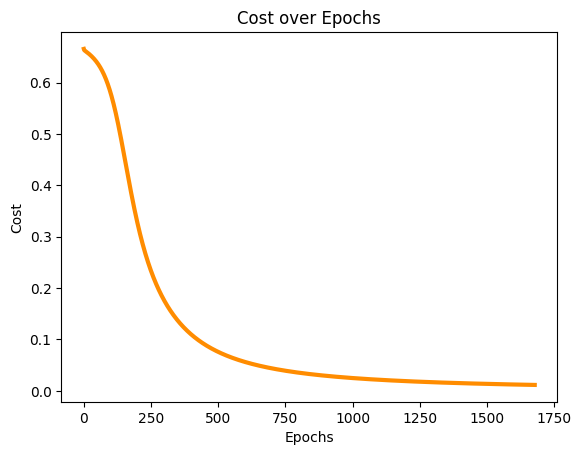

In [124]:
plt.plot(cost_history, lw=3, color="darkorange")
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost over Epochs')
plt.show()

In [125]:
predicted_probs=predicted_output.reshape(-1)
real_values=outputs.reshape(-1)
predicted_labels=(predicted_probs>=0.8).astype(int)

In [126]:
accuracy = accuracy_score(real_values, predicted_labels)
precision = precision_score(real_values, predicted_labels)
recall = recall_score(real_values, predicted_labels)
f1 = f1_score(real_values, predicted_labels)
print(accuracy,precision, recall,f1)

1.0 1.0 1.0 1.0
